<a href="https://colab.research.google.com/github/maceyworthington/DataScience-GenAI-Submissions/blob/main/EDA_Data_preparation_Practice_(Seminar_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving EDA-DP.csv to EDA-DP (7).csv


Ask AI to generate a dataframe from the imported data.

In [22]:
salary_df = pd.read_csv('EDA-DP.csv')
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


I then check for missing values using code from https://github.com/maceyworthington/DataScience-GenAI-Submissions/blob/main/5_02_Modelling_Hackathon_COMPLETED.ipynb

In [23]:
salary_df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


No missing values. I will then check for any unique values in the data using code from https://github.com/maceyworthington/DataScience-GenAI-Submissions/blob/main/Assignment_2/2_05_Exploratory_Data_Analysis_COMPLETED.ipynb

In [25]:
print(df['experience_level'].unique())
print(df['employment_type'].unique())


['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']


There are no unique values and the data looks as expected. I will then get descriptive statistics on the data using code from

In [26]:
salary_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


I will now start to visualise the data. I would like to visualise the correlation between experience level and salary. I will use AI to do this using the prompt: "compare the relationship between salary_in_usd and experience_level" for which the AI used a box chart

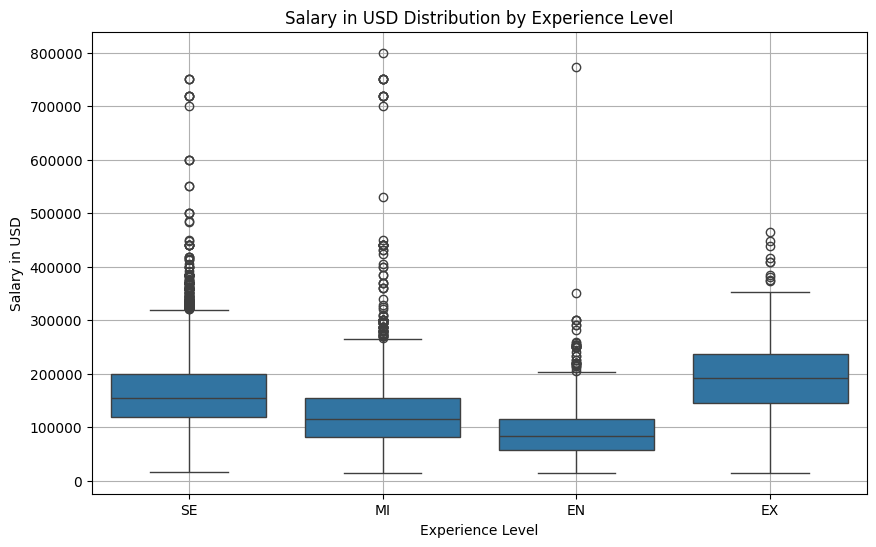

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='experience_level', y='salary_in_usd')
plt.title('Salary in USD Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

I used AI to look at the distribution of salary_in_usd by using the prompt "generate the distribution of salary_in_usd".

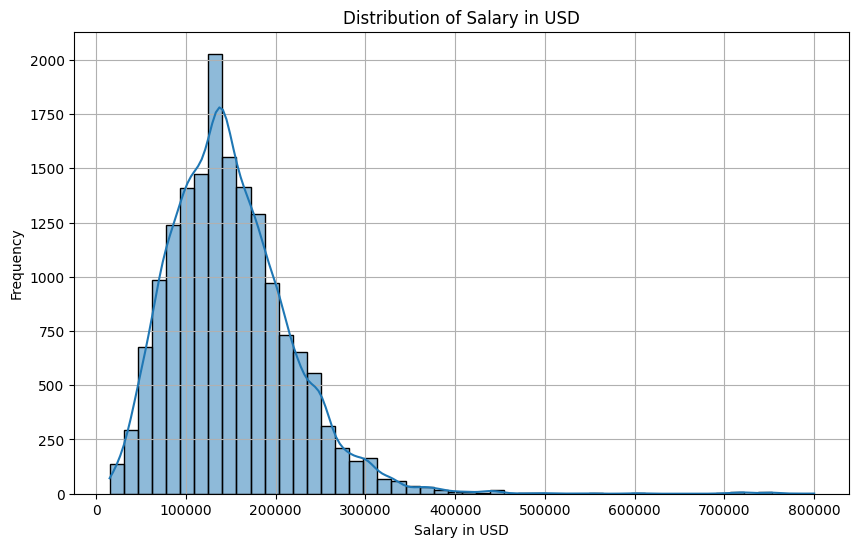

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

I then wanted to look at the average salary_in_usd for each experience_level, which I used AI for: "create a bar chart to visualise the salary_in_usd and experience_level".

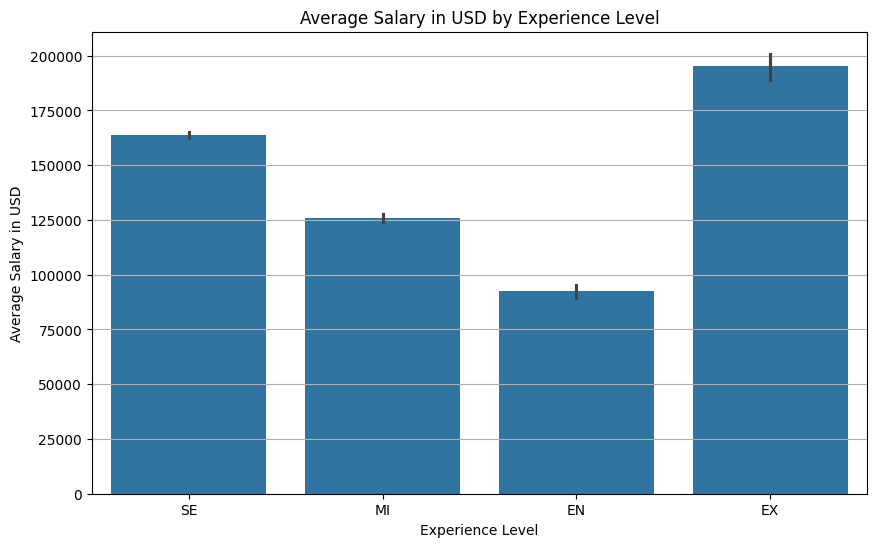

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_df, x='experience_level', y='salary_in_usd', estimator=np.mean)
plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.grid(axis='y')
plt.show()

This bar chart makes sense, as executives (EX) will be making the highest salary, followed by Senior, Middle-level, and Entry-level.

I wanted to look at one job role in particular and how salary changed depending on company size. For this I used AI to "create a bar chart to visualise the averay salary_in_usd by company_size for 'SE' values only.

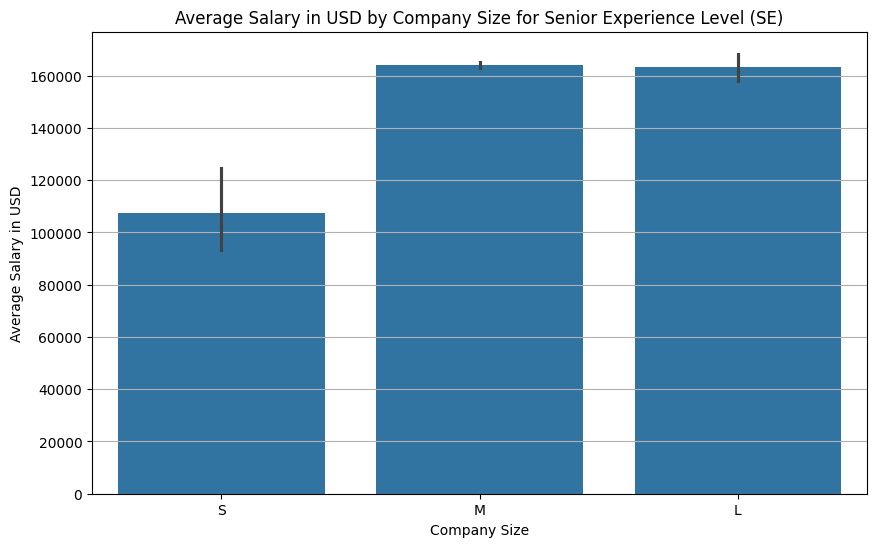

In [34]:
se_salary_df = salary_df[salary_df['experience_level'] == 'SE']
plt.figure(figsize=(10, 6))
sns.barplot(data=se_salary_df, x='company_size', y='salary_in_usd', estimator=np.mean, order=['S', 'M', 'L'])
plt.title('Average Salary in USD by Company Size for Senior Experience Level (SE)')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.grid(axis='y')
plt.show()